In [67]:
#https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats as sm_stats
import statsmodels.stats.api as sms
import math as mth

hospital_df = pd.read_csv("D:/STU_FIIT/Inzinierske_studium/2semester/OZNAL/hospital.csv")
pd.set_option("display.max_columns",None)
pd.set_option('max_colwidth', 999)
hospital_df.head()

,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCS Diagnosis Code,CCS Diagnosis Description,CCS Procedure Code,CCS Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,4,Urgent,Home or Self Care,2015,122,Pneumonia (except that caused by tuberculosis or sexually transmitted disease),0,NO PROC,139,Other pneumonia,4,Diseases and Disorders of the Respiratory System,2,Moderate,Minor,Medical,Medicare,Private Health Insurance,NaN,0,N,Y,5333.90,4818.42
1,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,4,Elective,Hosp Basd Medicare Approved Swing Bed,2015,55,Fluid and electrolyte disorders,0,NO PROC,422,Hypovolemia & related electrolyte disorders,10,"Endocrine, Nutritional and Metabolic Diseases and Disorders",2,Moderate,Moderate,Medical,Medicare,NaN,NaN,0,N,Y,4865.99,4588.78
2,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,4,Urgent,Home or Self Care,2015,122,Pneumonia (except that caused by tuberculosis or sexually transmitted disease),202,ELECTROCARDIOGRAM,139,Other pneumonia,4,Diseases and Disorders of the Respiratory System,1,Minor,Minor,Medical,Medicare,Private Health Insurance,NaN,0,N,Y,5901.54,5559.56
3,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,50 to 69,147,F,White,Not Span/Hispanic,2,Elective,Home or Self Care,2015,55,Fluid and electrolyte disorders,0,NO PROC,249,"Other gastroenteritis, nausa & vomiting",6,Diseases and Disorders of the Digestive System,2,Moderate,Minor,Medical,Medicare,NaN,NaN,0,N,Y,3619.08,3567.25
4,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,M,White,Not Span/Hispanic,2,Elective,Home or Self Care,2015,122,Pneumonia (except that caused by tuberculosis or sexually transmitted disease),0,NO PROC,139,Other pneumonia,4,Diseases and Disorders of the Respiratory System,1,Minor,Moderate,Medical,Medicare,Blue Cross/Blue Shield,Private Health Insurance,0,N,Y,3185.87,3167.89


In [68]:
hospital_df.loc[hospital_df['Total Costs'] > 20000.01, 'Total Costs'] = "Financne narocne vysetrenia"
hospital_df.loc[hospital_df['Total Costs'].between(10000.01,20000), 'Total Costs'] = "Financne priemerne vysetrenia"
hospital_df.loc[hospital_df['Total Costs'].between(0,10000), 'Total Costs'] = "Financne nenarocne vysetrenia"

In [69]:
hospital_df['Total Costs'] = hospital_df['Total Costs'].replace("Financne narocne vysetrenia", 3) 
hospital_df['Total Costs'] = hospital_df['Total Costs'].replace("Financne priemerne vysetrenia", 2) 
hospital_df['Total Costs'] = hospital_df['Total Costs'].replace("Financne nenarocne vysetrenia", 1) 

In [70]:
hospital_df['Total Costs'].unique()

array([1, 2, 3], dtype=int64)

In [71]:
hospital_df = hospital_df.drop(columns=['Ethnicity','Health Service Area','Hospital County','Facility Name', 'Facility Id', 'Zip Code - 3 digits', 'Operating Certificate Number', 'Discharge Year', 'CCS Diagnosis Code', 'CCS Procedure Code', 'APR DRG Code', 'APR MDC Code', 'APR Severity of Illness Code', 'Payment Typology 1', 'Payment Typology 2', 'Payment Typology 3', 'Total Charges'])

In [72]:
hospital_df

,Age Group,Gender,Race,Length of Stay,Type of Admission,Patient Disposition,CCS Diagnosis Description,CCS Procedure Description,APR DRG Description,APR MDC Description,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Costs
0,70 or Older,F,White,4,Urgent,Home or Self Care,Pneumonia (except that caused by tuberculosis or sexually transmitted disease),NO PROC,Other pneumonia,Diseases and Disorders of the Respiratory System,Moderate,Minor,Medical,0,N,Y,1
1,70 or Older,F,White,4,Elective,Hosp Basd Medicare Approved Swing Bed,Fluid and electrolyte disorders,NO PROC,Hypovolemia & related electrolyte disorders,"Endocrine, Nutritional and Metabolic Diseases and Disorders",Moderate,Moderate,Medical,0,N,Y,1
2,70 or Older,F,White,4,Urgent,Home or Self Care,Pneumonia (except that caused by tuberculosis or sexually transmitted disease),ELECTROCARDIOGRAM,Other pneumonia,Diseases and Disorders of the Respiratory System,Minor,Minor,Medical,0,N,Y,1
3,50 to 69,F,White,2,Elective,Home or Self Care,Fluid and electrolyte disorders,NO PROC,"Other gastroenteritis, nausa & vomiting",Diseases and Disorders of the Digestive System,Moderate,Minor,Medical,0,N,Y,1
4,70 or Older,M,White,2,Elective,Home or Self Care,Pneumonia (except that caused by tuberculosis or sexually transmitted disease),NO PROC,Other pneumonia,Diseases and Disorders of the Respiratory System,Minor,Moderate,Medical,0,N,Y,1
5,70 or Older,M,White,3,Urgent,Home or Self Care,Pneumonia (except that caused by tuberculosis or sexually transmitted disease),ELECTROCARDIOGRAM,Other pneumonia,Diseases and Disorders of the Respiratory System,Minor,Moderate,Medical,0,N,Y,1
6,70 or Older,F,White,4,Urgent,Home or Self Care,Pneumonia (except that caused by tuberculosis or sexually transmitted disease),NO PROC,Other pneumonia,Diseases and Disorders of the Respiratory System,Minor,Moderate,Medical,0,N,Y,1
7,70 or Older,F,White,4,Elective,Short-term Hospital,Diverticulosis and diverticulitis,NO PROC,Diverticulitis & diverticulosis,Diseases and Disorders of the Digestive System,Moderate,Moderate,Medical,0,N,N,1
8,50 to 69,F,White,3,Urgent,Home or Self Care,Chronic obstructive pulmonary disease and bronchiectasis,NO PROC,Chronic obstructive pulmonary disease,Diseases and Disorders of the Respiratory System,Moderate,Minor,Medical,0,N,Y,1
9,70 or Older,F,White,4,Elective,Home or Self Care,Influenza,NO PROC,Major respiratory infections & inflammations,Diseases and Disorders of the Respiratory System,Moderate,Minor,Medical,0,N,Y,1


In [73]:
hospital_df['Age Group'].isnull().values.any()
hospital_df['Gender'].isnull().values.any()
hospital_df['Race'].isnull().values.any()
hospital_df['Length of Stay'].isnull().values.any()
hospital_df['Type of Admission'].isnull().values.any()
hospital_df['Patient Disposition'].isnull().values.any()
hospital_df['CCS Diagnosis Description'].isnull().values.any()
hospital_df['CCS Procedure Description'].isnull().values.any()
hospital_df['APR DRG Description'].isnull().values.any()
hospital_df['APR MDC Description'].isnull().values.any()
hospital_df['APR Medical Surgical Description'].isnull().values.any()
hospital_df['Birth Weight'].isnull().values.any()
hospital_df['Abortion Edit Indicator'].isnull().values.any()
hospital_df['Emergency Department Indicator'].isnull().values.any()
hospital_df['Total Costs'].isnull().values.any()

False

In [74]:
hospital_df['APR Severity of Illness Description'].isnull().sum()

111

In [75]:
hospital_df['APR Risk of Mortality'].isnull().sum()

111

In [76]:
hospital_df[hospital_df['APR Severity of Illness Description'].isnull()]

,Age Group,Gender,Race,Length of Stay,Type of Admission,Patient Disposition,CCS Diagnosis Description,CCS Procedure Description,APR DRG Description,APR MDC Description,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Costs
73502,0 to 17,M,White,8,Newborn,Home w/ Home Health Services,Liveborn,CIRCUMCISION,Ungroupable,Pre-MDC or Ungroupable,NaN,NaN,Not Applicable,2200,N,N,1
268463,0 to 17,M,Black/African American,1,Newborn,Short-term Hospital,Liveborn,RESP INTUB/MECH VENTIL,Ungroupable,Pre-MDC or Ungroupable,NaN,NaN,Not Applicable,2200,N,N,1
269563,0 to 17,M,Black/African American,1,Newborn,Expired,Liveborn,NO PROC,Ungroupable,Pre-MDC or Ungroupable,NaN,NaN,Not Applicable,1500,N,N,1
276090,0 to 17,M,Black/African American,1,Newborn,Expired,Liveborn,NO PROC,Ungroupable,Pre-MDC or Ungroupable,NaN,NaN,Not Applicable,1200,N,N,1
311511,30 to 49,F,White,4,Emergency,Home or Self Care,Miscellaneous disorders,NO PROC,Principal diagnosis invalid as discharge diagnosis,"Pregnancy, Childbirth and the Puerperium",NaN,NaN,Not Applicable,0,N,Y,1
311725,18 to 29,F,Other Race,3,Emergency,Home or Self Care,Miscellaneous disorders,NO PROC,Principal diagnosis invalid as discharge diagnosis,"Pregnancy, Childbirth and the Puerperium",NaN,NaN,Not Applicable,0,N,N,1
316639,30 to 49,F,White,1,Emergency,Home or Self Care,Diabetes or abnormal glucose tolerance complicating pregnancy; childbirth; or the puerperium,NO PROC,Principal diagnosis invalid as discharge diagnosis,"Pregnancy, Childbirth and the Puerperium",NaN,NaN,Not Applicable,0,N,N,1
316671,0 to 17,F,Black/African American,2,Emergency,Home or Self Care,Other complications of birth; puerperium affecting management of mother,NO PROC,Principal diagnosis invalid as discharge diagnosis,"Pregnancy, Childbirth and the Puerperium",NaN,NaN,Not Applicable,0,N,N,1
316878,18 to 29,F,White,3,Emergency,Home or Self Care,Prolonged pregnancy,NO PROC,Principal diagnosis invalid as discharge diagnosis,"Pregnancy, Childbirth and the Puerperium",NaN,NaN,Not Applicable,0,N,N,1
327508,30 to 49,F,White,2,Urgent,Home or Self Care,Other complications of birth; puerperium affecting management of mother,OT PRCS TO ASSIST DELIV,Principal diagnosis invalid as discharge diagnosis,"Pregnancy, Childbirth and the Puerperium",NaN,NaN,Not Applicable,0,N,N,1


In [77]:
hospital_df['APR Severity of Illness Description'].unique()

array(['Moderate', 'Minor', 'Major', 'Extreme', nan], dtype=object)

In [78]:
hospital_df['APR Risk of Mortality'].unique()

array(['Minor', 'Moderate', 'Major', 'Extreme', nan], dtype=object)

In [79]:
hospital_df['APR Severity of Illness Description'].fillna( method ='ffill', inplace = True) 
hospital_df['APR Risk of Mortality'].fillna( method ='ffill', inplace = True) 

In [80]:
hospital_df['APR Severity of Illness Description'].isnull().values.any()
hospital_df['APR Risk of Mortality'].isnull().values.any()

False

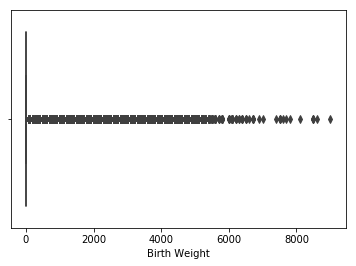

In [81]:
sns.boxplot(x = hospital_df['Birth Weight'])

In [82]:
hospital_df['CCS Diagnosis Description'].value_counts()

Liveborn                                                                          226910
Septicemia (except in labor)                                                      108910
Osteoarthritis                                                                     63476
Congestive heart failure; nonhypertensive                                          58761
Mood disorders                                                                     56976
Pneumonia (except that caused by tuberculosis or sexually transmitted disease)     47054
Alcohol-related disorders                                                          43738
Schizophrenia and other psychotic disorders                                        43125
Cardiac dysrhythmias                                                               42639
Other complications of birth; puerperium affecting management of mother            39633
Complication of device; implant or graft                                           38537
Skin and subcutaneous

In [83]:
hospital_df['Total Costs'][hospital_df['CCS Diagnosis Description'] == 'Female infertility'].value_counts()

1    6
2    2
Name: Total Costs, dtype: int64

In [84]:
hospital_df['Total Costs'][hospital_df['CCS Diagnosis Description'] == 'Osteoporosis'].value_counts()

1    17
3     7
2     4
Name: Total Costs, dtype: int64

In [85]:
hospital_df['Total Costs'][hospital_df['CCS Diagnosis Description'] == 'Contraceptive and procreative management'].value_counts()

1    17
2     5
3     1
Name: Total Costs, dtype: int64

In [86]:
hospital_df['Total Costs'][hospital_df['CCS Diagnosis Description'] == 'Cataract'].value_counts()

1    16
2    12
3     5
Name: Total Costs, dtype: int64

In [87]:
hospital_df['Total Costs'][hospital_df['CCS Diagnosis Description'] == 'Birth trauma'].value_counts()

1    33
3     9
2     9
Name: Total Costs, dtype: int64

In [88]:
keys = hospital_df['CCS Diagnosis Description'].value_counts().keys()

for i in keys:
    if hospital_df['CCS Diagnosis Description'][hospital_df['CCS Diagnosis Description'] == i].count() <= 5000:
        hospital_df['CCS Diagnosis Description'] = hospital_df['CCS Diagnosis Description'].replace(i, "Other") 
        
hospital_df['CCS Diagnosis Description'].value_counts()

Other                                                                                                                 281095
Liveborn                                                                                                              226910
Septicemia (except in labor)                                                                                          108910
Osteoarthritis                                                                                                         63476
Congestive heart failure; nonhypertensive                                                                              58761
Mood disorders                                                                                                         56976
Pneumonia (except that caused by tuberculosis or sexually transmitted disease)                                         47054
Alcohol-related disorders                                                                                              43738


In [89]:
hospital_df['APR DRG Description'].value_counts()

Neonate birthwt >2499g, normal newborn or neonate w other problem    198207
Vaginal delivery                                                     147000
Septicemia & disseminated infections                                  95079
Cesarean delivery                                                     76093
Heart failure                                                         56367
Other pneumonia                                                       43010
Chronic obstructive pulmonary disease                                 40767
Knee joint replacement                                                38499
Schizophrenia                                                         35653
Cellulitis & other skin infections                                    34722
Cardiac arrhythmia & conduction disorders                             32885
Hip joint replacement                                                 32596
RENAL FAILURE                                                         29228
Kidney & uri

In [90]:
keys = hospital_df['APR DRG Description'].value_counts().keys()

for i in keys:
    if hospital_df['APR DRG Description'][hospital_df['APR DRG Description'] == i].count() <= 5000:
        hospital_df['APR DRG Description'] = hospital_df['APR DRG Description'].replace(i, "Other") 
        
hospital_df['APR DRG Description'].value_counts()

Other                                                                   366651
Neonate birthwt >2499g, normal newborn or neonate w other problem       198207
Vaginal delivery                                                        147000
Septicemia & disseminated infections                                     95079
Cesarean delivery                                                        76093
Heart failure                                                            56367
Other pneumonia                                                          43010
Chronic obstructive pulmonary disease                                    40767
Knee joint replacement                                                   38499
Schizophrenia                                                            35653
Cellulitis & other skin infections                                       34722
Cardiac arrhythmia & conduction disorders                                32885
Hip joint replacement                               

In [91]:
hospital_df['APR MDC Description'].value_counts()

Diseases and Disorders of the Circulatory System                                                        289506
Pregnancy, Childbirth and the Puerperium                                                                254102
Newborns and Other Neonates with Conditions Originating in the Perinatal Period                         231958
Diseases and Disorders of the Musculoskeletal System and Conn Tissue                                    204684
Diseases and Disorders of the Digestive System                                                          197637
Diseases and Disorders of the Respiratory System                                                        196392
Diseases and Disorders of the Nervous System                                                            141879
Infectious and Parasitic Diseases, Systemic or Unspecified Sites                                        131132
Mental Diseases and Disorders                                                                           116259
D

In [92]:
dummies1 = pd.get_dummies(hospital_df['Age Group'])
dummies2 = pd.get_dummies(hospital_df['Gender'])
dummies3 = pd.get_dummies(hospital_df['Race'])
dummies4 = pd.get_dummies(hospital_df['Type of Admission'])
dummies5 = pd.get_dummies(hospital_df['Patient Disposition'])
dummies6 = pd.get_dummies(hospital_df['CCS Diagnosis Description'])
dummies7 = pd.get_dummies(hospital_df['CCS Procedure Description'])
dummies8 = pd.get_dummies(hospital_df['APR DRG Description'])
dummies9 = pd.get_dummies(hospital_df['APR MDC Description'])
dummies10 = pd.get_dummies(hospital_df['APR Severity of Illness Description'])
dummies11 = pd.get_dummies(hospital_df['APR Risk of Mortality'])
dummies12 = pd.get_dummies(hospital_df['APR Medical Surgical Description'])
dummies13 = pd.get_dummies(hospital_df['Abortion Edit Indicator'])
dummies14 = pd.get_dummies(hospital_df['Emergency Department Indicator'])

In [93]:
merged_df = pd.concat([hospital_df, dummies1, dummies2, dummies3, dummies4, dummies5, dummies6, dummies7, dummies8, dummies9, dummies10, dummies11, dummies12, dummies13, dummies14], axis = 'columns')

In [94]:
merged_df

,Age Group,Gender,Race,Length of Stay,Type of Admission,Patient Disposition,CCS Diagnosis Description,CCS Procedure Description,APR DRG Description,APR MDC Description,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Costs,0 to 17,18 to 29,30 to 49,50 to 69,70 or Older,F,M,U,Black/African American,Multi-racial,Other Race,White,Elective,Emergency,Newborn,Not Available,Trauma,Urgent,Another Type Not Listed,Cancer Center or Children's Hospital,Court/Law Enforcement,Critical Access Hospital,Expired,Facility w/ Custodial/Supportive Care,Federal Health Care Facility,Home or Self Care,Home w/ Home Health Services,Hosp Basd Medicare Approved Swing Bed,Hospice - Home,Hospice - Medical Facility,Inpatient Rehabilitation Facility,Left Against Medical Advice,Medicaid Cert Nursing Facility,Medicare Cert Long Term Care Hospital,Psychiatric Hospital or Unit of Hosp,Short-term Hospital,Skilled Nursing Home,Abdominal hernia,Abdominal pain,Acute and unspecified renal failure,Acute bronchitis,Acute cerebrovascular disease,Acute myocardial infarction,Alcohol-related disorders,Aortic; peripheral; and visceral artery aneurysms,Appendicitis and other appendiceal conditions,Aspiration pneumonitis; food/vomitus,Asthma,Benign neoplasm of uterus,Biliary tract disease,Calculus of urinary tract,Cancer of breast,Cancer of bronchus; lung,Cancer of colon,Cardiac dysrhythmias,Chronic obstructive pulmonary disease and bronchiectasis,Complication of device; implant or graft,Complications of surgical procedures or medical care,Conditions associated with dizziness or vertigo,Congestive heart failure; nonhypertensive,Coronary atherosclerosis and other heart disease,Deficiency and other anemia,"Delirium, dementia, and amnestic and other cognitive disorders",Diabetes mellitus with complications,Diabetes or abnormal glucose tolerance complicating pregnancy; childbirth; or the puerperium,Diverticulosis and diverticulitis,Early or threatened labor,Epilepsy; convulsions,Esophageal disorders,Essential hypertension,Fetal distress and abnormal forces of labor,Fluid and electrolyte disorders,Fracture of lower limb,Fracture of neck of femur (hip),Fracture of upper limb,Gastritis and duodenitis,Gastrointestinal hemorrhage,Heart valve disorders,Hypertension complicating pregnancy; childbirth and the puerperium,Hypertension with complications and secondary hypertension,Influenza,Intestinal infection,Intestinal obstruction without hernia,Intracranial injury,Liveborn,Maintenance chemotherapy; radiotherapy,Malposition; malpresentation,Mood disorders,Noninfectious gastroenteritis,Nonspecific chest pain,OB-related trauma to perineum and vulva,Osteoarthritis,Other,Other and unspecified benign neoplasm,Other circulatory disease,Other complications of birth; puerperium affecting management of mother,Other complications of pregnancy,Other connective tissue disease,Other fractures,Other gastrointestinal disorders,Other injuries and conditions due to external causes,Other liver diseases,Other lower respiratory disease,Other nervous system disorders,Other nutritional; endocrine; and metabolic disorders,Other pregnancy and delivery including normal,Pancreatic disorders (not diabetes),Peri-; endo-; and myocarditis; cardiomyopathy (except that caused by tuberculosis or sexually transmitted disease),Peripheral and visceral atherosclerosis,Phlebitis; thrombophlebitis and thromboembolism,Pleurisy; pneumothorax; pulmonary collapse,Pneumonia (except that caused by tuberculosis or sexually transmitted disease),Poisoning by other medications and drugs,Polyhydramnios and other problems of amniotic cavity,Previous C-section,Prolonged pregnancy,Pulmonary heart disease,Regional enteritis and ulcerative colitis,Rehabilitation care; fitting of prostheses; and adjustment of devices,Residual codes; unclassified,Respiratory failure; insufficiency; arrest (adult),Schizophrenia and other psychotic

In [95]:
final1 = merged_df.drop(columns=['Age Group', 'Gender', 'Race', 'Type of Admission', 'Patient Disposition', 'CCS Diagnosis Description', 'CCS Procedure Description', 'APR DRG Description', 'APR MDC Description', 'APR Severity of Illness Description', 'APR Risk of Mortality', 'APR Medical Surgical Description', 'Abortion Edit Indicator', 'Emergency Department Indicator'])

In [96]:
final1['Length of Stay'] = final1['Length of Stay'].replace('120 +', '120')
features = final1.head(10000)

D:\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [97]:
# Labels are the values we want to predict
labels = np.array(features['Total Costs'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('Total Costs', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [100]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

('Training Features Shape:', (7500L, 519L))
('Training Labels Shape:', (7500L,))
('Testing Features Shape:', (2500L, 519L))
('Testing Labels Shape:', (2500L,))


In [101]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

In [102]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [103]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

('Mean Absolute Error:', 0.22, 'degrees.')


In [104]:
mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

('Accuracy:', 85.21, '%.')


In [105]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

for i in feature_importances:
    print "Variable: " + i[0] + ", Importance: " + str(i[1])

Variable: Length of Stay, Importance: 0.34
Variable: Pregnancy, Childbirth and the Puerperium, Importance: 0.1
Variable: Medical, Importance: 0.06
Variable: Surgical, Importance: 0.06
Variable: NO PROC, Importance: 0.03
Variable: 30 to 49, Importance: 0.01
Variable: 50 to 69, Importance: 0.01
Variable: 70 or Older, Importance: 0.01
Variable: F, Importance: 0.01
Variable: M, Importance: 0.01
Variable: Home or Self Care, Importance: 0.01
Variable: Home w/ Home Health Services, Importance: 0.01
Variable: Inpatient Rehabilitation Facility, Importance: 0.01
Variable: Skilled Nursing Home, Importance: 0.01
Variable: PERC TRANSLUM COR ANGIO, Importance: 0.01
Variable: RESP INTUB/MECH VENTIL, Importance: 0.01
Variable: Other, Importance: 0.01
Variable: Diseases and Disorders of the Circulatory System, Importance: 0.01
Variable: Diseases and Disorders of the Musculoskeletal System and Conn Tissue, Importance: 0.01
Variable: Mental Diseases and Disorders, Importance: 0.01
Variable: Extreme, Impo

In [106]:
hospital_df

,Age Group,Gender,Race,Length of Stay,Type of Admission,Patient Disposition,CCS Diagnosis Description,CCS Procedure Description,APR DRG Description,APR MDC Description,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Costs
0,70 or Older,F,White,4,Urgent,Home or Self Care,Pneumonia (except that caused by tuberculosis or sexually transmitted disease),NO PROC,Other pneumonia,Diseases and Disorders of the Respiratory System,Moderate,Minor,Medical,0,N,Y,1
1,70 or Older,F,White,4,Elective,Hosp Basd Medicare Approved Swing Bed,Fluid and electrolyte disorders,NO PROC,Hypovolemia & related electrolyte disorders,"Endocrine, Nutritional and Metabolic Diseases and Disorders",Moderate,Moderate,Medical,0,N,Y,1
2,70 or Older,F,White,4,Urgent,Home or Self Care,Pneumonia (except that caused by tuberculosis or sexually transmitted disease),ELECTROCARDIOGRAM,Other pneumonia,Diseases and Disorders of the Respiratory System,Minor,Minor,Medical,0,N,Y,1
3,50 to 69,F,White,2,Elective,Home or Self Care,Fluid and electrolyte disorders,NO PROC,"Other gastroenteritis, nausa & vomiting",Diseases and Disorders of the Digestive System,Moderate,Minor,Medical,0,N,Y,1
4,70 or Older,M,White,2,Elective,Home or Self Care,Pneumonia (except that caused by tuberculosis or sexually transmitted disease),NO PROC,Other pneumonia,Diseases and Disorders of the Respiratory System,Minor,Moderate,Medical,0,N,Y,1
5,70 or Older,M,White,3,Urgent,Home or Self Care,Pneumonia (except that caused by tuberculosis or sexually transmitted disease),ELECTROCARDIOGRAM,Other pneumonia,Diseases and Disorders of the Respiratory System,Minor,Moderate,Medical,0,N,Y,1
6,70 or Older,F,White,4,Urgent,Home or Self Care,Pneumonia (except that caused by tuberculosis or sexually transmitted disease),NO PROC,Other pneumonia,Diseases and Disorders of the Respiratory System,Minor,Moderate,Medical,0,N,Y,1
7,70 or Older,F,White,4,Elective,Short-term Hospital,Diverticulosis and diverticulitis,NO PROC,Diverticulitis & diverticulosis,Diseases and Disorders of the Digestive System,Moderate,Moderate,Medical,0,N,N,1
8,50 to 69,F,White,3,Urgent,Home or Self Care,Chronic obstructive pulmonary disease and bronchiectasis,NO PROC,Chronic obstructive pulmonary disease,Diseases and Disorders of the Respiratory System,Moderate,Minor,Medical,0,N,Y,1
9,70 or Older,F,White,4,Elective,Home or Self Care,Influenza,NO PROC,Major respiratory infections & inflammations,Diseases and Disorders of the Respiratory System,Moderate,Minor,Medical,0,N,Y,1


In [107]:
df=hospital_df[['APR DRG Description','APR MDC Description']]
df['APR DRG Description']=df['APR DRG Description'].astype('category').cat.codes
df['APR MDC Description']=df['APR MDC Description'].astype('category').cat.codes
df.corr()

D:\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,APR DRG Description,APR MDC Description
APR DRG Description,1.000000,0.288395
APR MDC Description,0.288395,1.000000


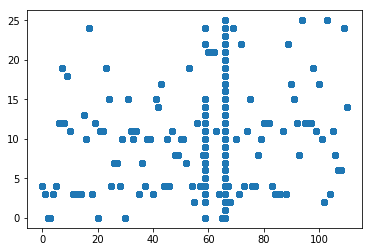

In [108]:
plt.scatter(df['APR DRG Description'], df['APR MDC Description'])
plt.show()

In [109]:
df2 = hospital_df[['CCS Diagnosis Description','APR DRG Description']]
df2['CCS Diagnosis Description']=df2['CCS Diagnosis Description'].astype('category').cat.codes
df2['APR DRG Description']=df2['APR DRG Description'].astype('category').cat.codes
df2.corr()

D:\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,CCS Diagnosis Description,APR DRG Description
CCS Diagnosis Description,1.000000,0.336803
APR DRG Description,0.336803,1.000000


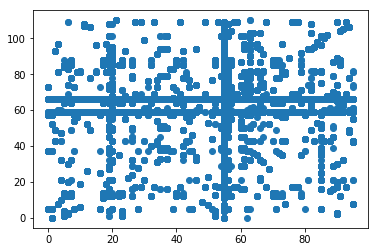

In [110]:
plt.scatter(df2['CCS Diagnosis Description'], df2['APR DRG Description'])
plt.show()

In [111]:
df3 = hospital_df[['CCS Diagnosis Description','APR MDC Description']]
df3['CCS Diagnosis Description']=df3['CCS Diagnosis Description'].astype('category').cat.codes
df3['APR MDC Description']=df3['APR MDC Description'].astype('category').cat.codes
df3.corr()

D:\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,CCS Diagnosis Description,APR MDC Description
CCS Diagnosis Description,1.000000,0.324781
APR MDC Description,0.324781,1.000000


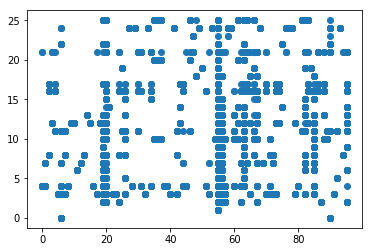

In [112]:
plt.scatter(df3['CCS Diagnosis Description'], df3['APR MDC Description'])
plt.show()

In [113]:
df4 = hospital_df[['CCS Diagnosis Description','APR Severity of Illness Description']]
df4['CCS Diagnosis Description']=df4['CCS Diagnosis Description'].astype('category').cat.codes
df4['APR Severity of Illness Description']=df4['APR Severity of Illness Description'].astype('category').cat.codes
df4.corr()

D:\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,CCS Diagnosis Description,APR Severity of Illness Description
CCS Diagnosis Description,1.000000,-0.011501
APR Severity of Illness Description,-0.011501,1.000000


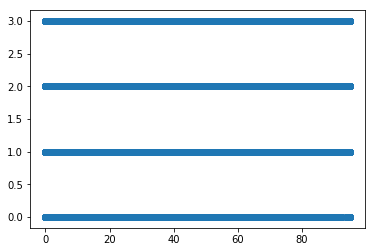

In [114]:
plt.scatter(df4['CCS Diagnosis Description'], df4['APR Severity of Illness Description'])
plt.show()

In [115]:
df5 = hospital_df[['CCS Diagnosis Description','APR Risk of Mortality']]
df5['CCS Diagnosis Description']=df5['CCS Diagnosis Description'].astype('category').cat.codes
df5['APR Risk of Mortality']=df5['APR Risk of Mortality'].astype('category').cat.codes
df5.corr()

D:\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,CCS Diagnosis Description,APR Risk of Mortality
CCS Diagnosis Description,1.00000,-0.06049
APR Risk of Mortality,-0.06049,1.00000


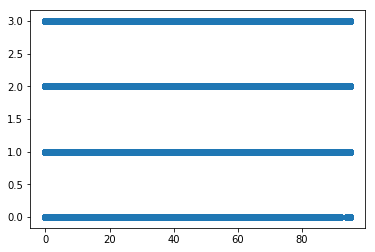

In [116]:
plt.scatter(df5['CCS Diagnosis Description'], df5['APR Risk of Mortality'])
plt.show()

In [117]:
df6 = hospital_df[['CCS Diagnosis Description','Race']]
df6['CCS Diagnosis Description']=df6['CCS Diagnosis Description'].astype('category').cat.codes
df6['Race']=df6['Race'].astype('category').cat.codes
df6.corr()

D:\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,CCS Diagnosis Description,Race
CCS Diagnosis Description,1.000000,0.004117
Race,0.004117,1.000000


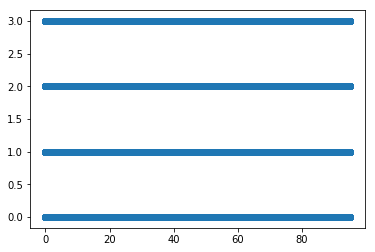

In [118]:
plt.scatter(df6['CCS Diagnosis Description'], df6['Race'])
plt.show()

In [120]:
df7 = hospital_df[['CCS Diagnosis Description','Age Group']]
df7['CCS Diagnosis Description']=df7['CCS Diagnosis Description'].astype('category').cat.codes
df7['Age Group']=df7['Age Group'].astype('category').cat.codes
df7.corr()

D:\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,CCS Diagnosis Description,Age Group
CCS Diagnosis Description,1.00000,-0.06418
Age Group,-0.06418,1.00000


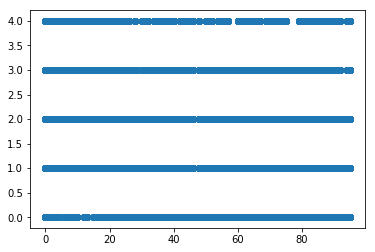

In [121]:
plt.scatter(df7['CCS Diagnosis Description'], df7['Age Group'])
plt.show()

In [122]:
df8 = hospital_df[['APR Severity of Illness Description','APR Risk of Mortality']]
df8['APR Severity of Illness Description']=df8['APR Severity of Illness Description'].astype('category').cat.codes
df8['APR Risk of Mortality']=df8['APR Risk of Mortality'].astype('category').cat.codes
df8.corr()

D:\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,APR Severity of Illness Description,APR Risk of Mortality
APR Severity of Illness Description,1.000000,0.503532
APR Risk of Mortality,0.503532,1.000000


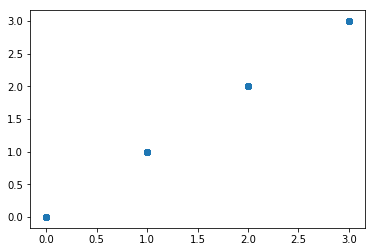

In [124]:
plt.scatter(df8['APR Severity of Illness Description'], df8['APR Severity of Illness Description'])
plt.show()

In [125]:
df9 = hospital_df[['CCS Diagnosis Description','CCS Procedure Description']]
df9['CCS Diagnosis Description']=df9['CCS Diagnosis Description'].astype('category').cat.codes
df9['CCS Procedure Description']=df9['CCS Procedure Description'].astype('category').cat.codes
df9.corr()

D:\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,CCS Diagnosis Description,CCS Procedure Description
CCS Diagnosis Description,1.000000,0.076374
CCS Procedure Description,0.076374,1.000000


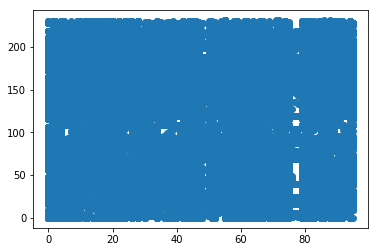

In [126]:
plt.scatter(df9['CCS Diagnosis Description'], df9['CCS Procedure Description'])
plt.show()